# Introduction

This notebook is dedicated to exploring and visualizing data features before applying machine learning models for predicting hotel booking cancellations. The objective is to understand the distribution and relationships of various features within the dataset, which will ultimately aid in the development and improvement of our predictive models.

Accurate prediction of hotel booking cancellations is crucial for optimizing hotel operations, improving customer satisfaction, and enhancing revenue management strategies. By analyzing historical booking data, we can identify patterns and trends that indicate the likelihood of a booking being canceled. This knowledge enables hotel managers to make informed decisions, such as overbooking to compensate for expected cancellations or offering incentives to customers to minimize cancellations.

In [1]:
# !nvcc -V && which nvcc

In [2]:
#!python --version
#!nvidia-smi

In [3]:
# !pip install cudf-cu12 --extra-index-url=https://pypi.nvidia.com

# Importing Libraries

In [4]:
# importing libraries fundamentals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
from matplotlib import pyplot

import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
%matplotlib inline


# Library for Null Values Imputing
import missingno as msno

# importing cudas

# Loading the Dataset

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hotel_bookings.csv


In [6]:
# load cudas extension

# %load_ext cudf.pandas

df = pd.read_csv('/kaggle/input/hotel_bookings.csv')

## Dataset Information

In [7]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.describe()
# description of dataset

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [10]:
df.info()

# there by are 32 columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df.shape
# Dataset has 119390 rows and 32 columns

(119390, 32)

In [12]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## Find the Categorical and Numerical dtype

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


In [14]:
for col in object_columns:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for hotel:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
Counts for arrival_date_month:
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64
Counts for meal:
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
Counts for country:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
FJI        1
UMI        1
LCA        1
MRT        1
ASM        1
Name: count, Length: 177, dtype: int64
Counts for market_segment:
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int

In [15]:
num_cols = df.select_dtypes(include=['float', 'int64']).columns
print(num_cols)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


# Dealt with Null Values

In [16]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

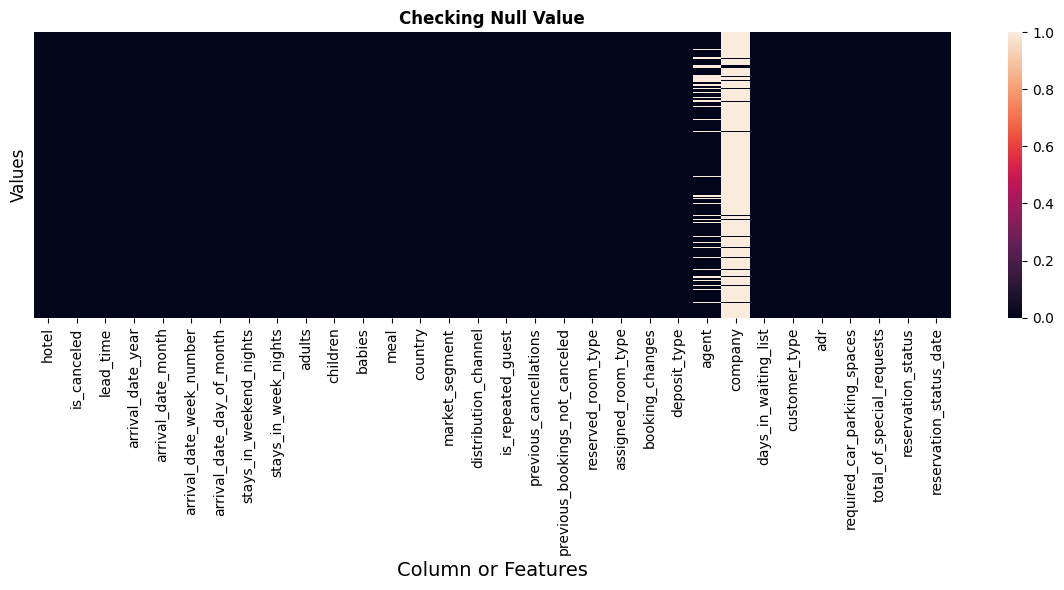

In [17]:
# Plotting Null Values using HeatMap

plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), yticklabels=False)
plt.title('Checking Null Value', weight='bold')
plt.xlabel('Column or Features', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.tight_layout()

In [ ]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
df[missing_columns].info()

from there we could see the most null values is company, so we will drop the feature or column 'company'

In [19]:
# dropping company column, i used to drop it cause the data was so many values null

df = df.drop(['company'], axis=1)

In [20]:
def fill_categorical(df):
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

def fill_numerical(df):
    num_cols = df.select_dtypes(include=['number']).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].mean())
    return df

# Fill missing values
df = fill_categorical(df)
df = fill_numerical(df)

In [21]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
df[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Empty DataFrame


## Dealt with Duplicated Value

In [22]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 87370, dtype: bool

theres no null value again :)

# Exploratory Data Analysis

In [25]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370,87370
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-02-14
freq,53426,11257,67955,27882,51613,69133,56530,46301,86225,71968,63346,211


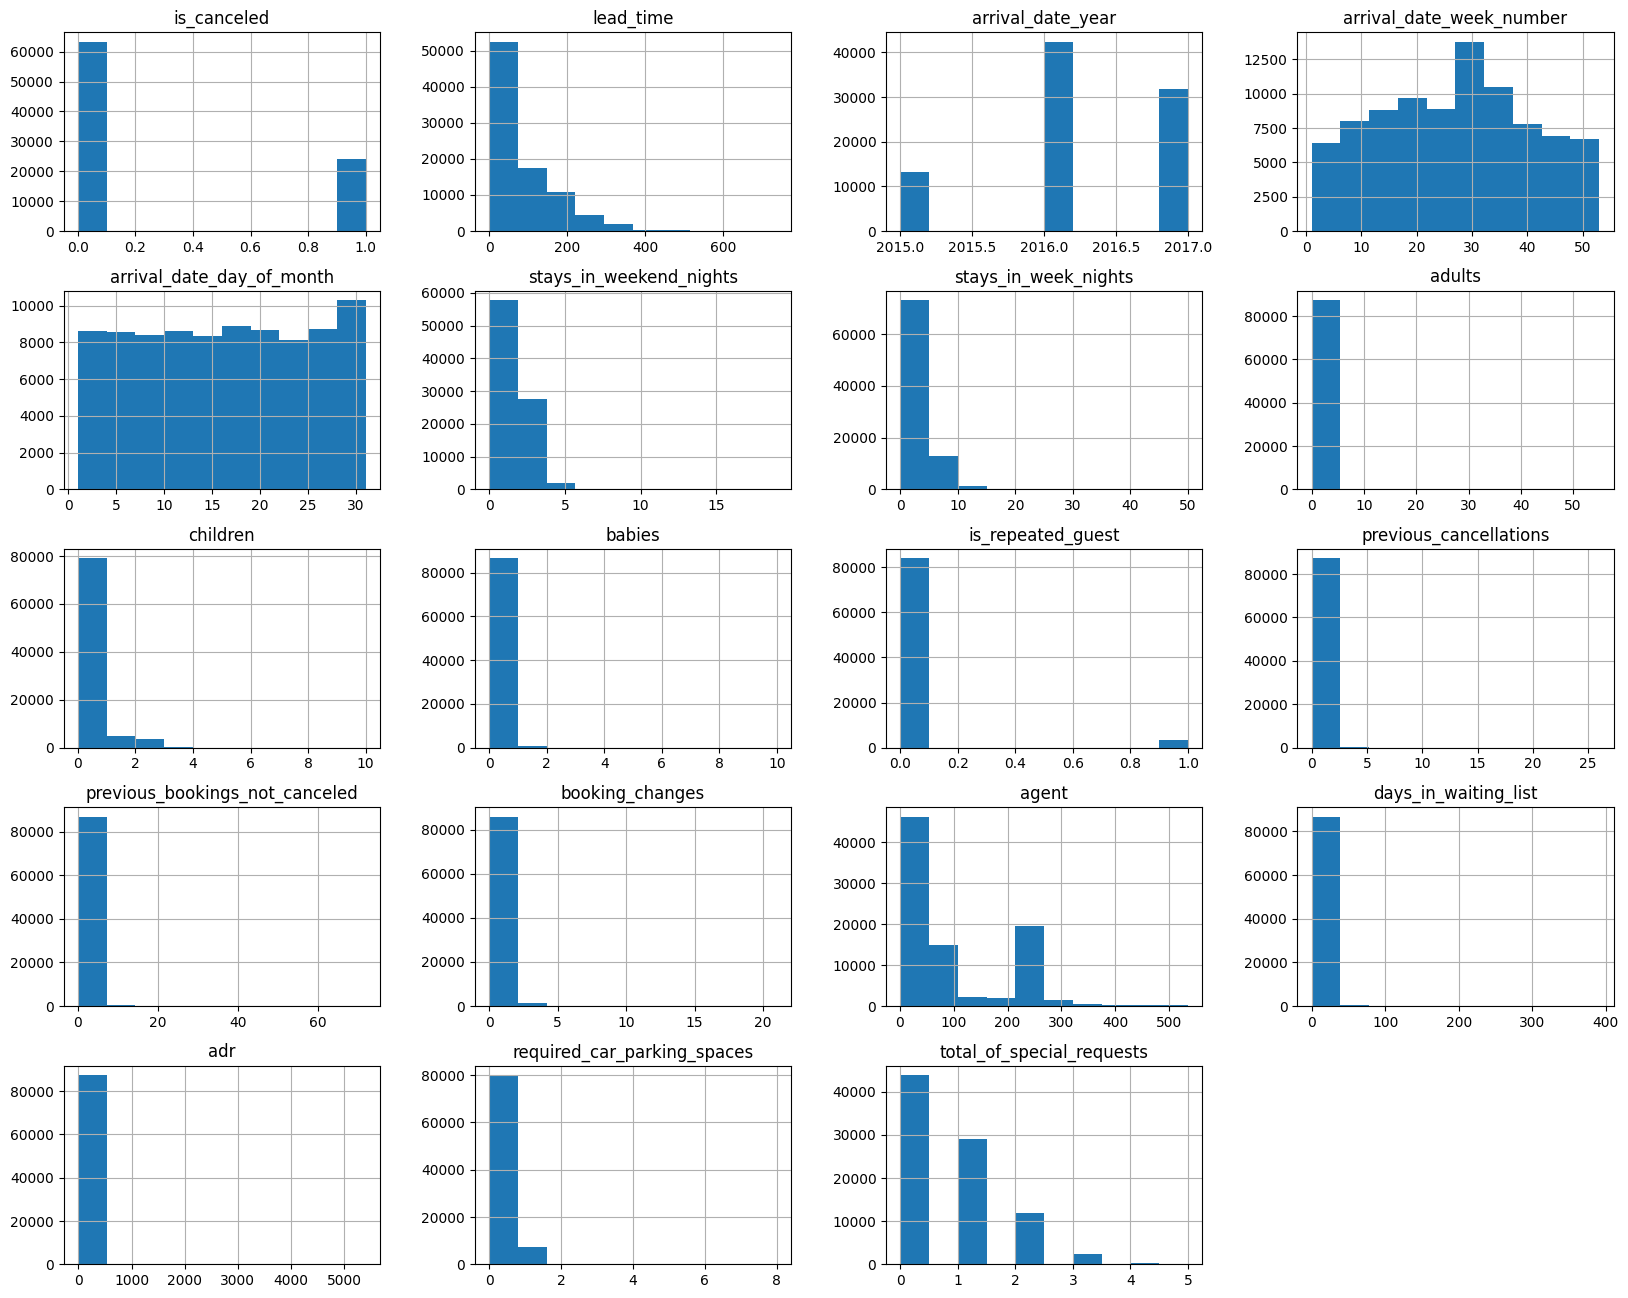

In [26]:
df.hist(figsize=(20, 16))
plt.show()

In [27]:
def plot_pie_single(column):
    target_column = df[column].value_counts()
    plt.figure(figsize=(12, 8))
    fig1, ax1 = plt.subplots()
    ax1.pie(target_column, labels=target_column.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title(f"{column}_Value_Counts", fontsize=14, fontweight="bold", size=14)
    plt.show()

In [28]:
def plot_bar_single(column):
    target_column = df[column].value_counts()
    plt.figure(figsize=(12, 8))
    target_column.plot(kind='bar', color=plt.cm.tab20(range(len(target_column))))
    plt.title(f"{column}_Value_Counts", fontsize=14, fontweight="bold", size=14)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Target Column For Prediction (is_canceled)

In [29]:
df['is_canceled'].value_counts()

is_canceled
0    63346
1    24024
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

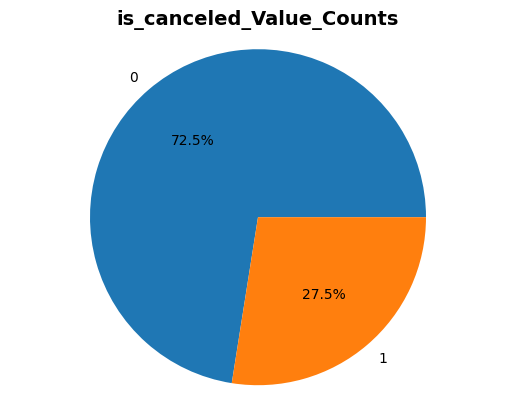

In [30]:
plot_pie_single('is_canceled')

## Plotting Num Cols and Cat Cols

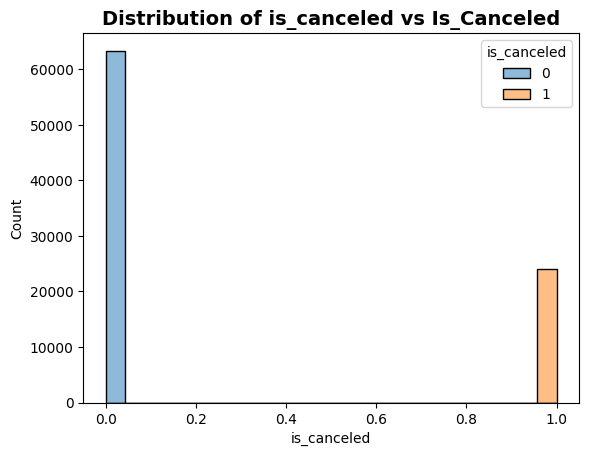

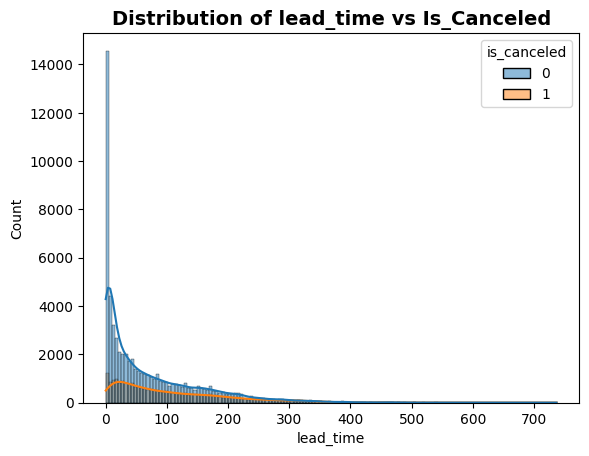

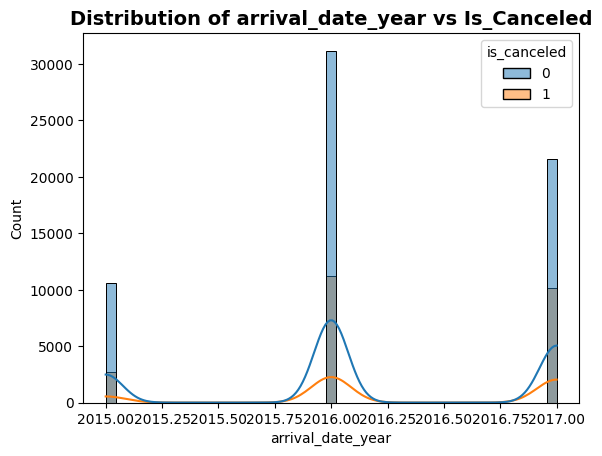

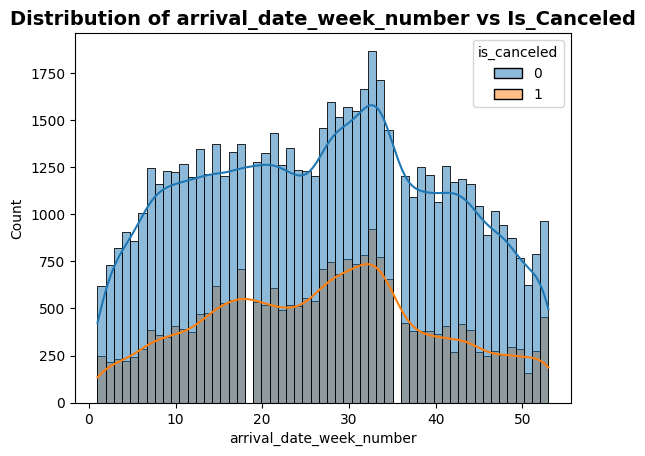

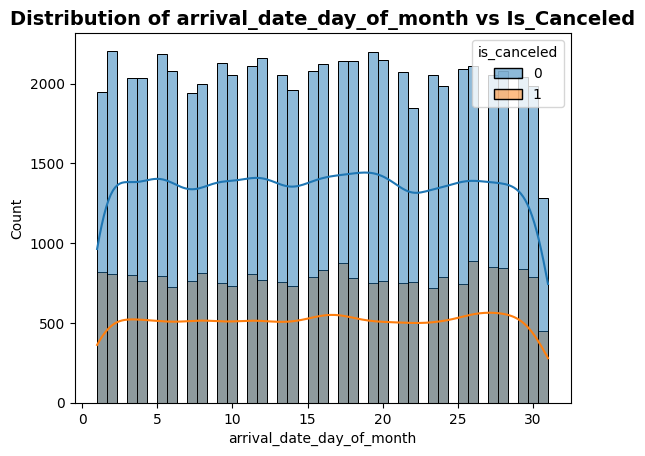

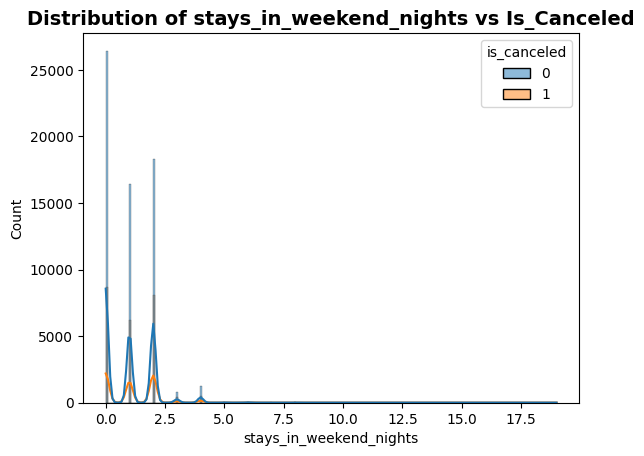

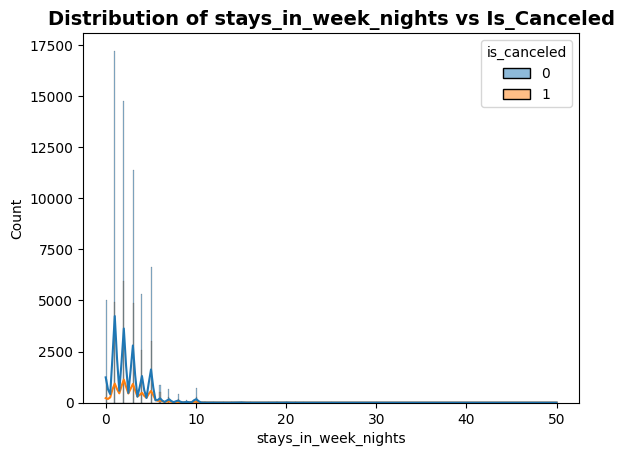

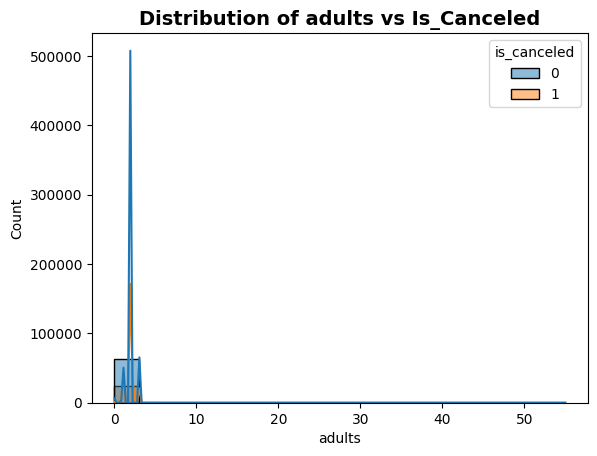

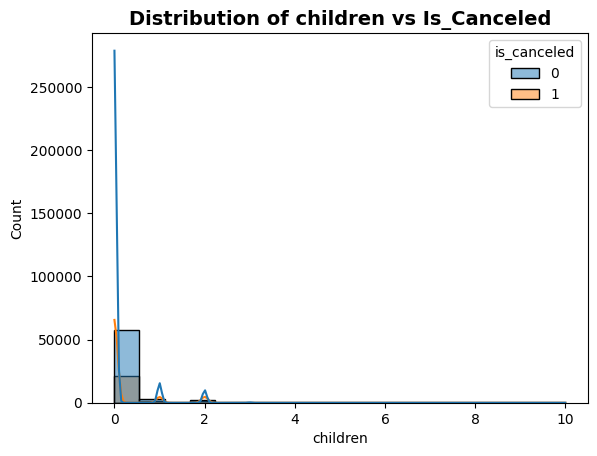

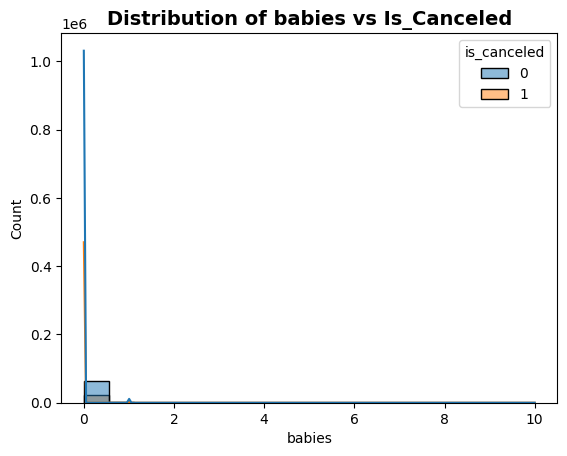

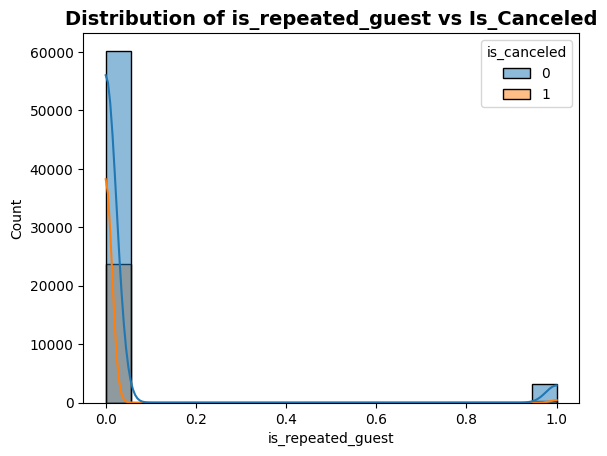

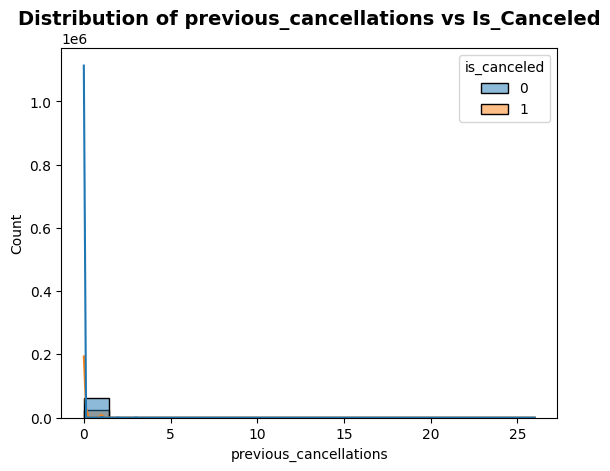

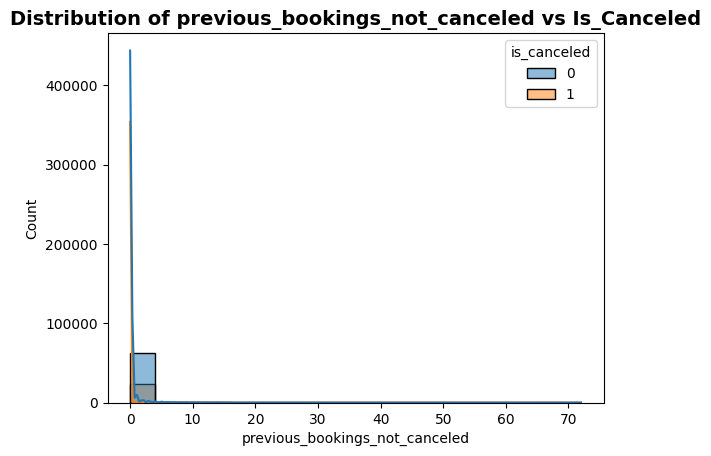

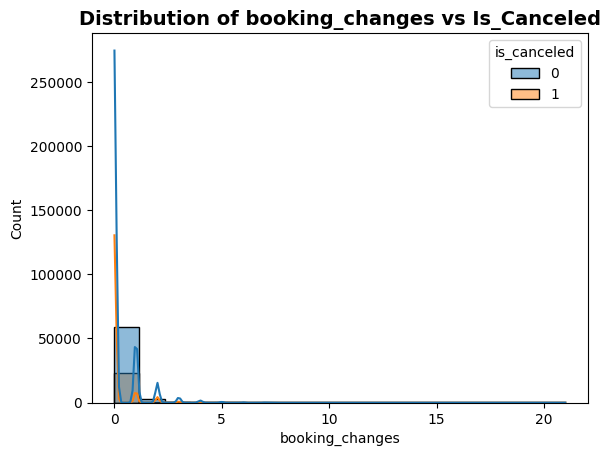

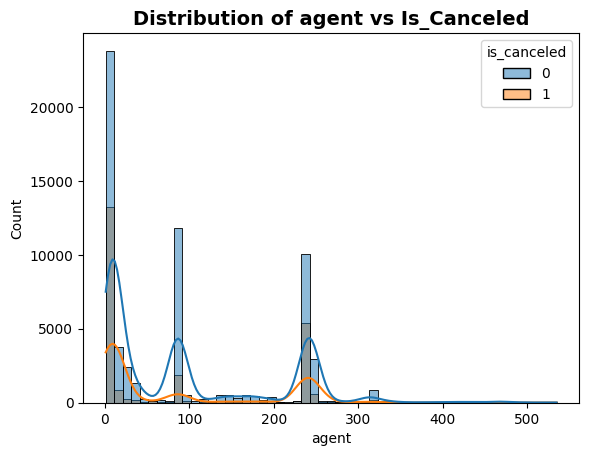

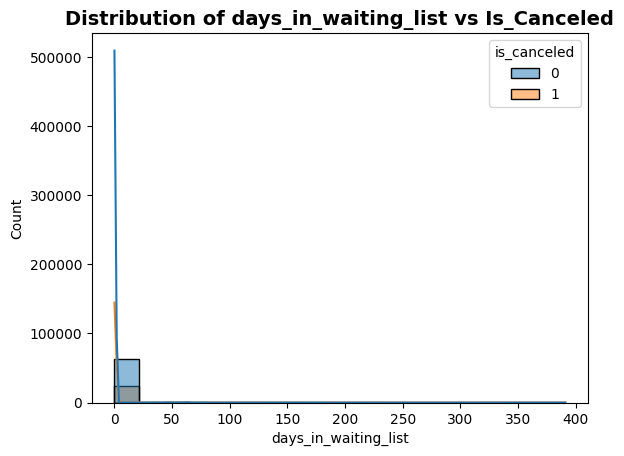

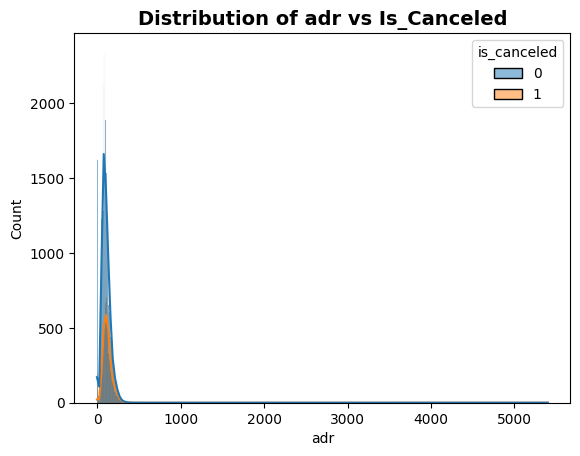

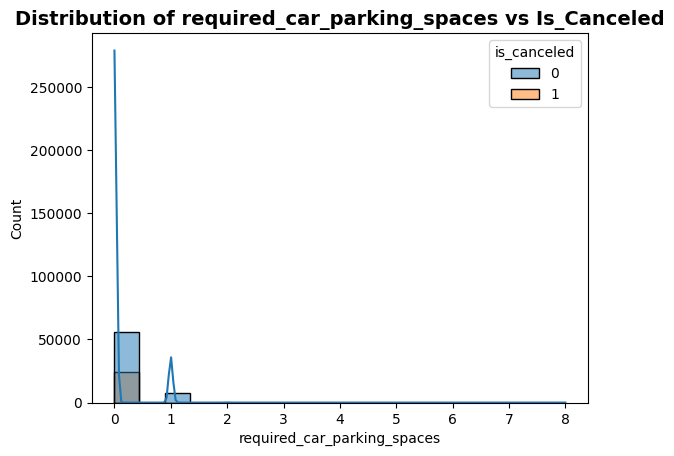

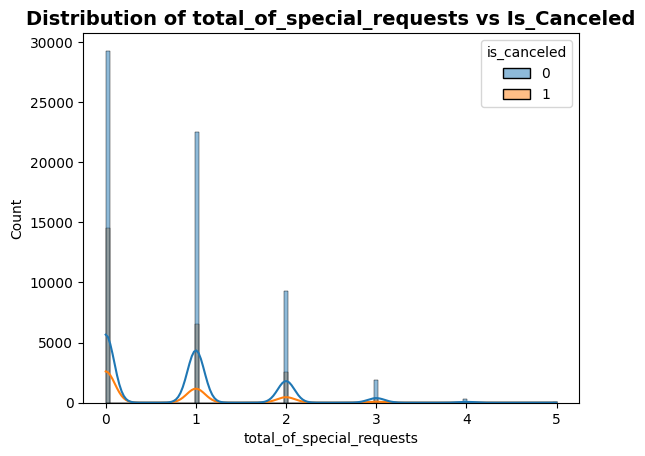

In [31]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# Plot histograms
for col in num_col:
    sns.histplot(data=df, x=col, hue='is_canceled', kde=True)
    plt.title(f'Distribution of {col} vs Is_Canceled', fontweight="bold", size=14)
    plt.show()
    print("\n")

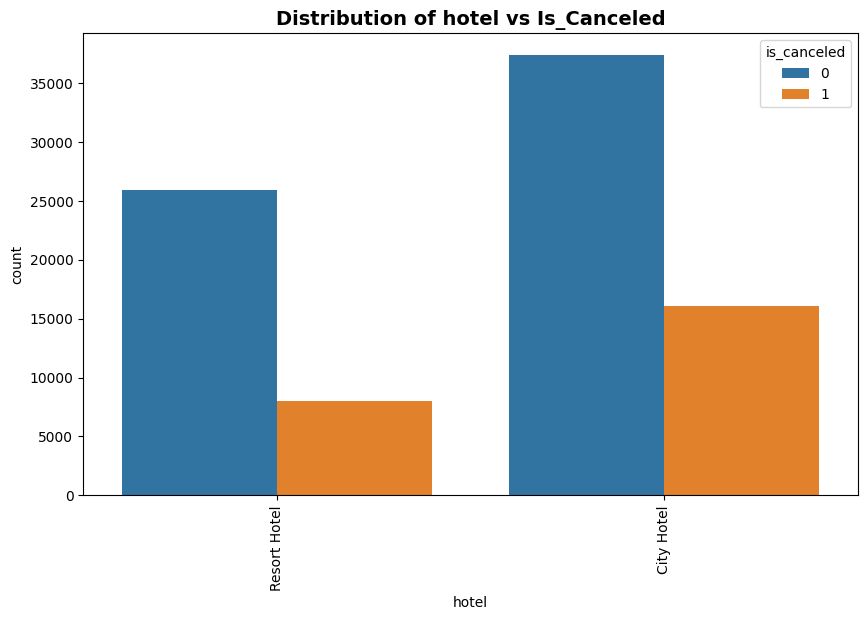

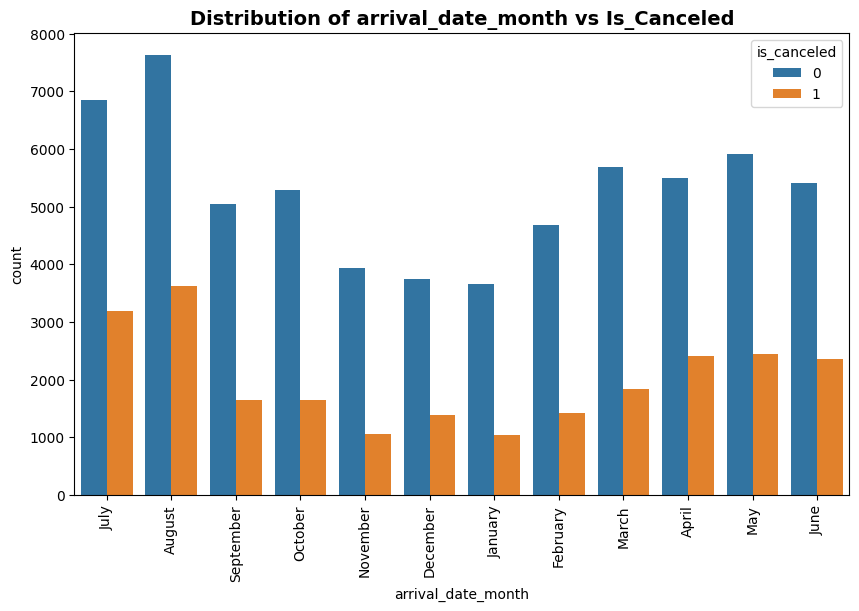

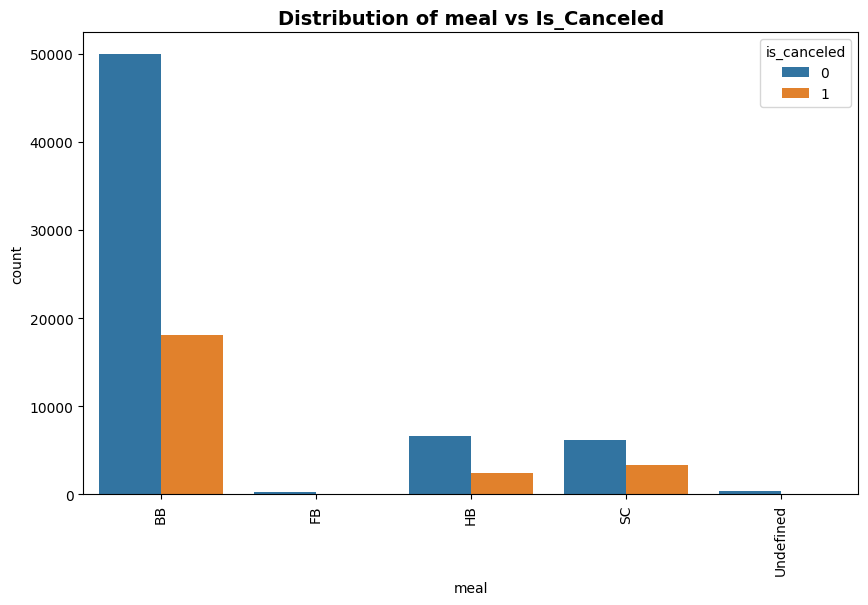

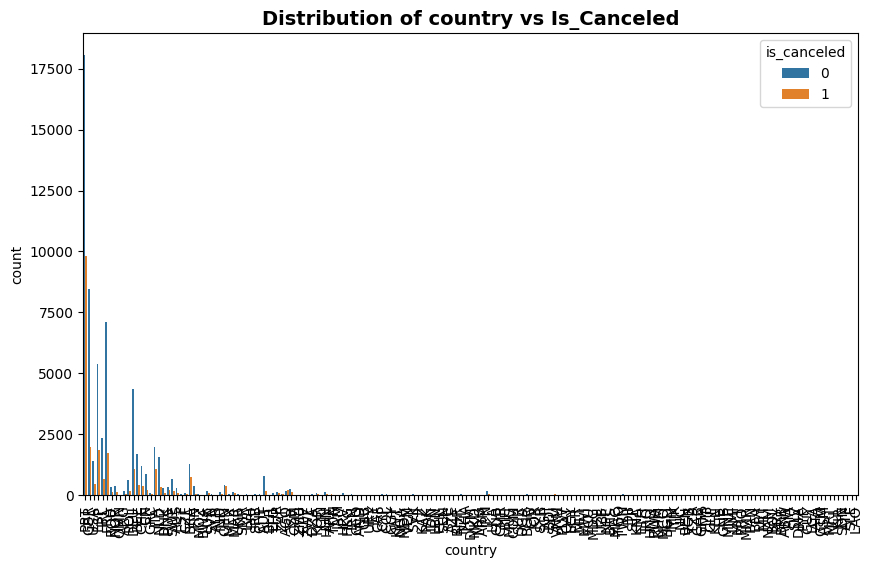

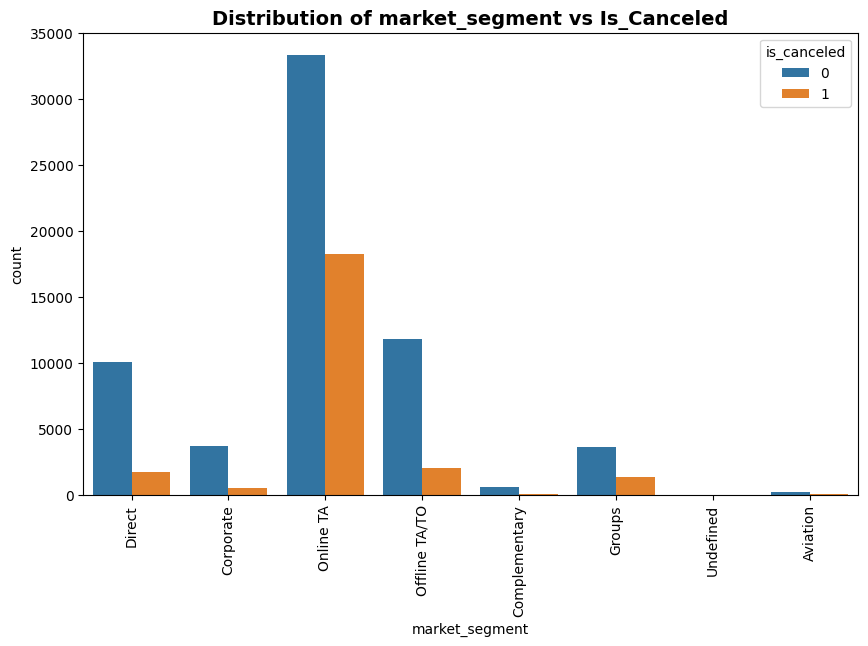

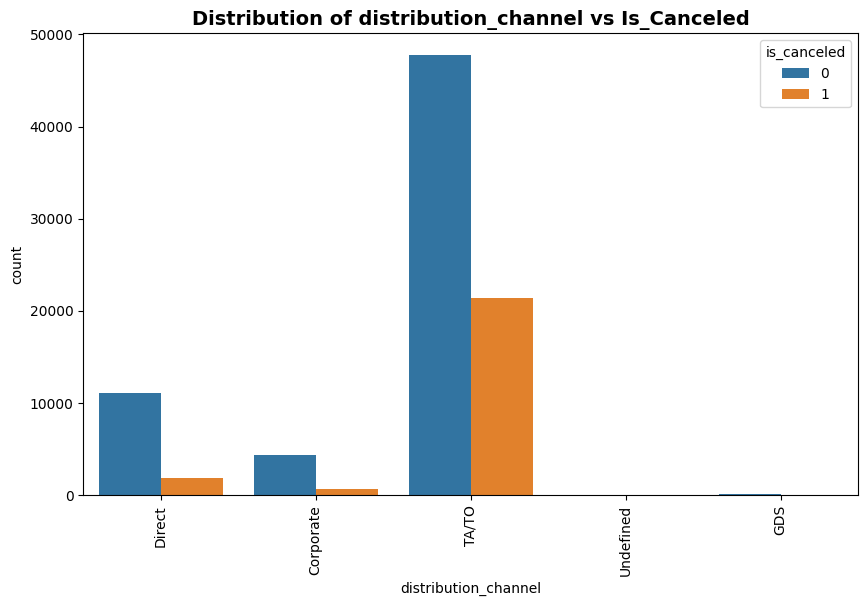

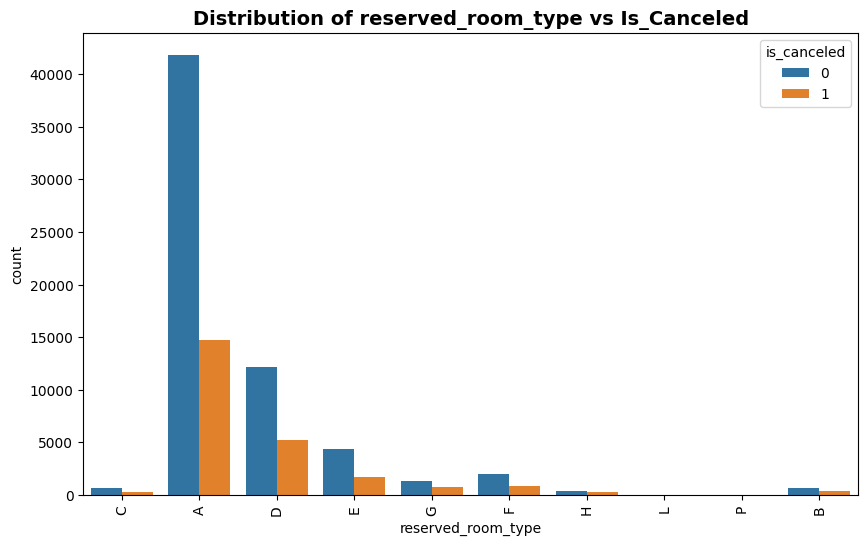

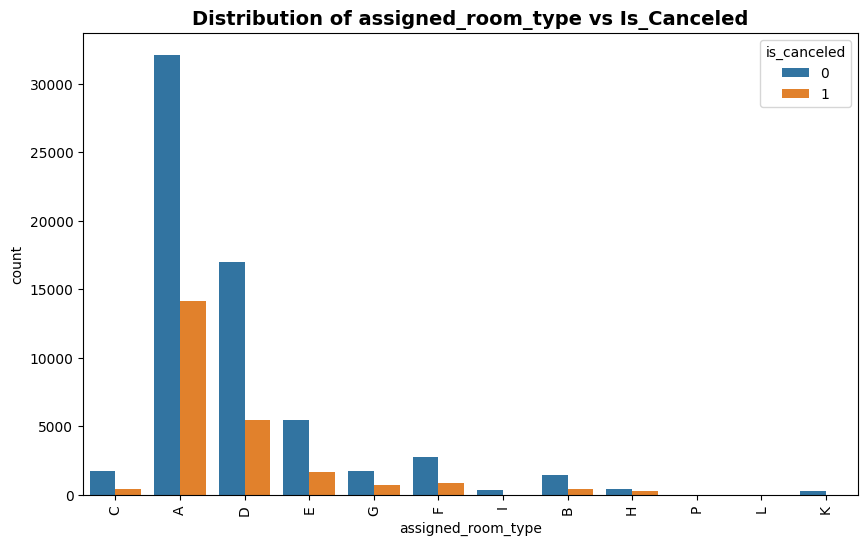

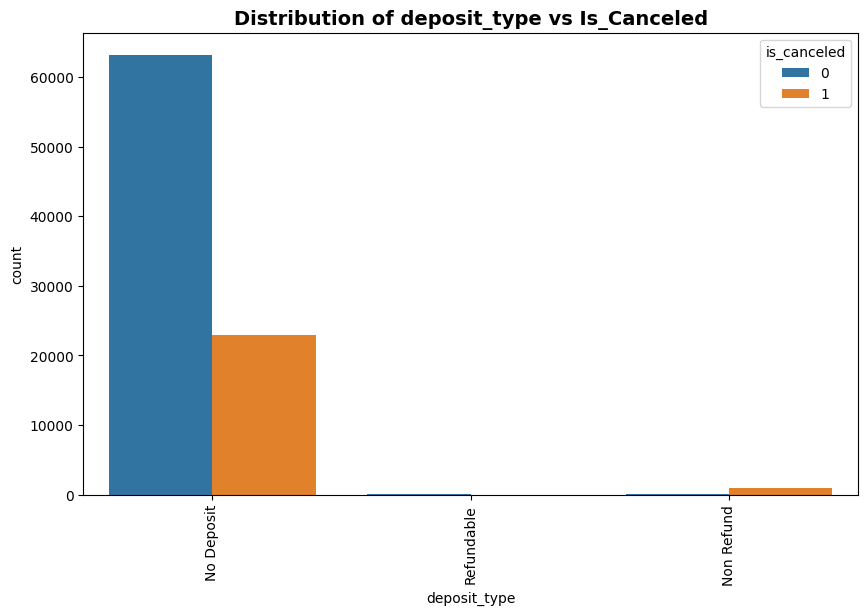

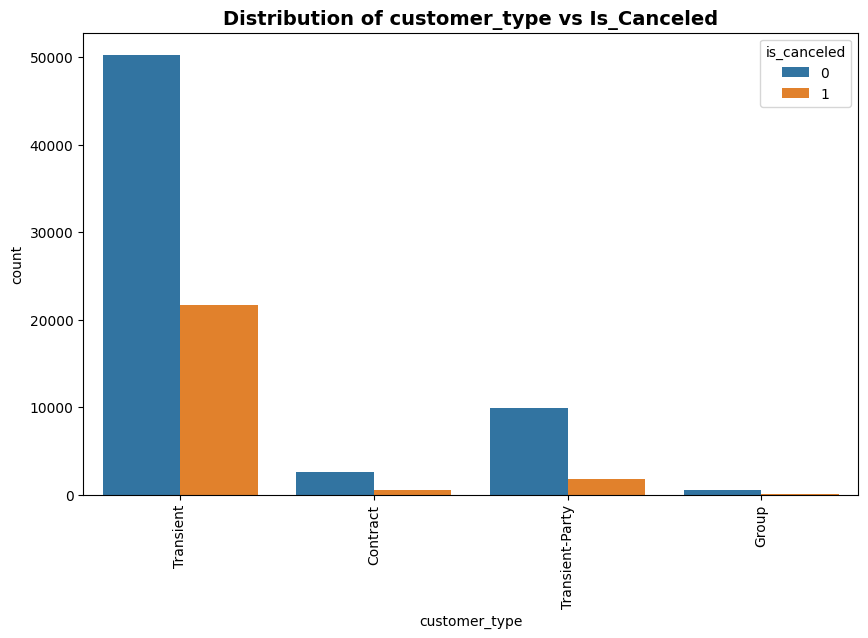

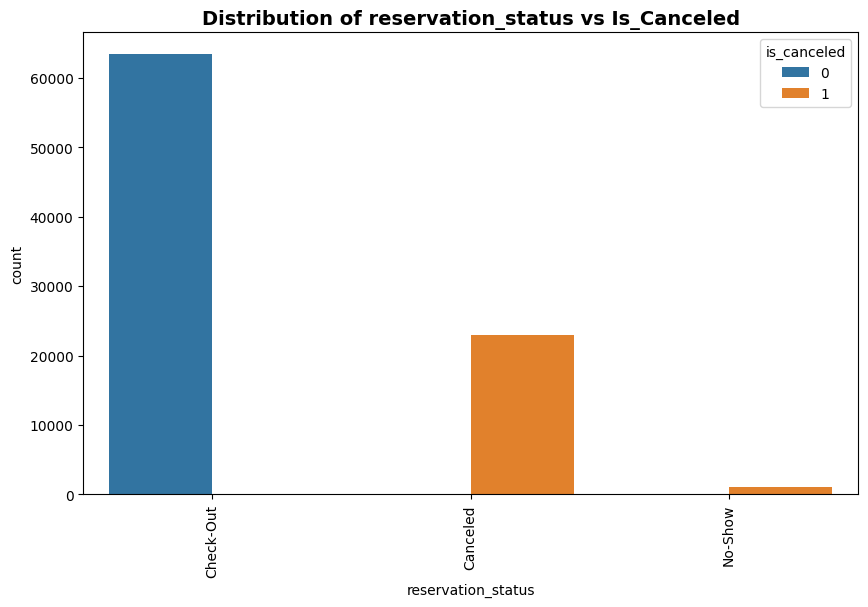

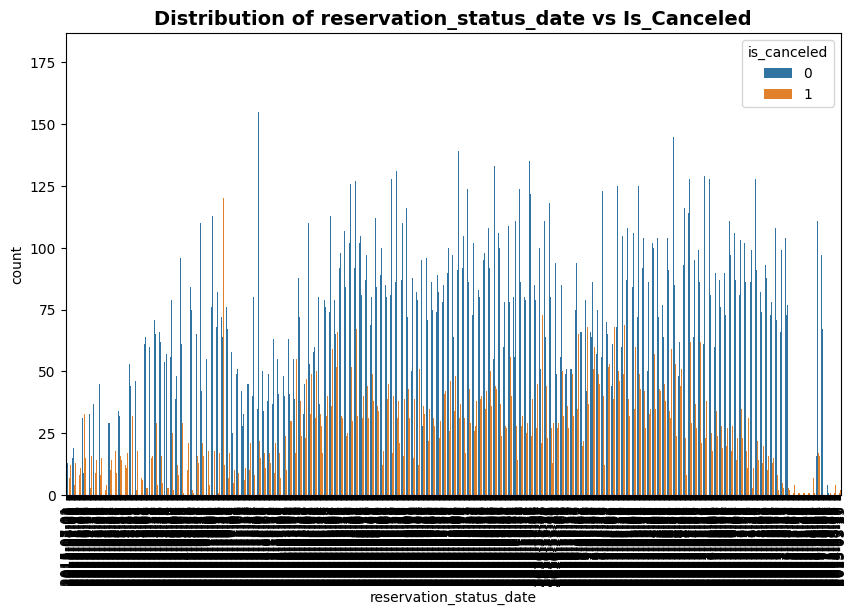

In [32]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df,x=col,hue='is_canceled', )
  plt.title(f'Distribution of {col} vs Is_Canceled', fontweight="bold", size=14)
  plt.xticks(rotation=90)
  plt.show()
  print("\n")

## Plotting All Over Data Features

Text(0.5, 1.0, 'Arriving year, Lead time and Cancelations')

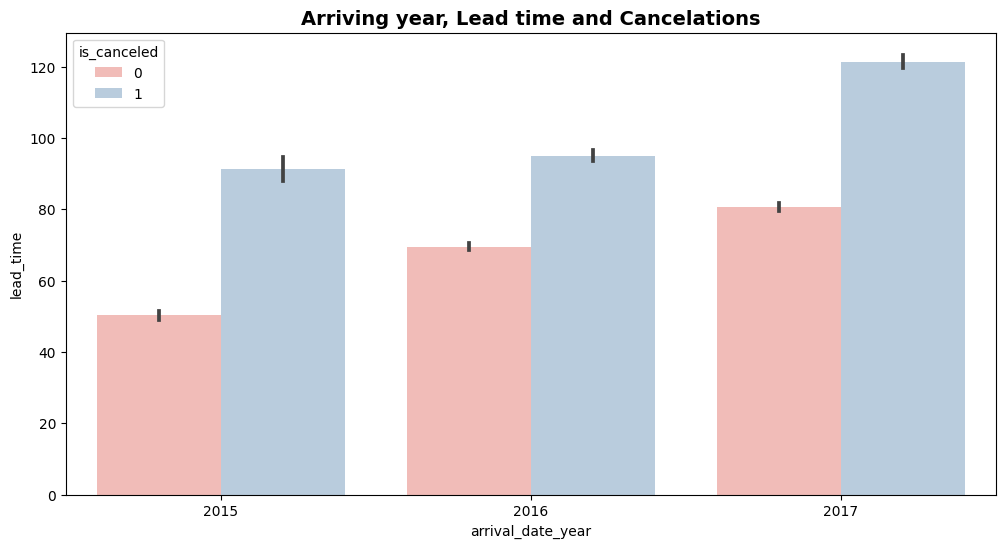

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y ='lead_time',hue ='is_canceled', data = df, palette='Pastel1')
plt.title('Arriving year, Lead time and Cancelations', fontweight="bold", size=14)

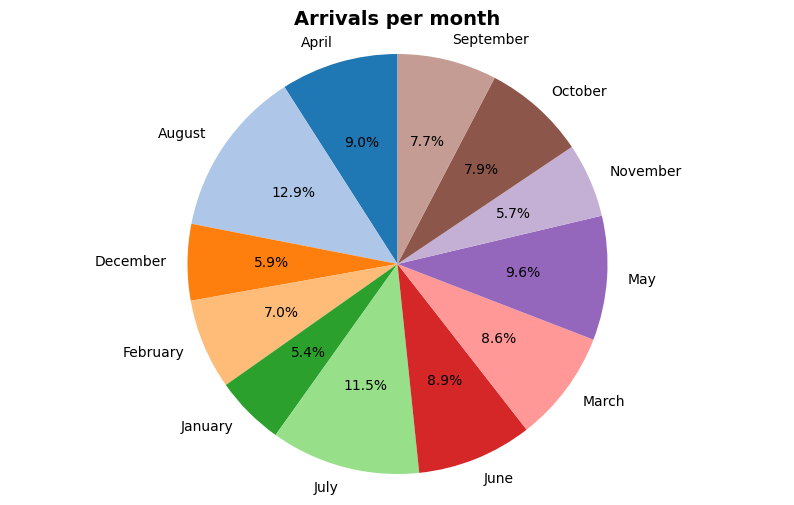

In [34]:
arrivals_per_month = df.groupby('arrival_date_month').size()
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(arrivals_per_month, labels=arrivals_per_month.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
ax.set_title('Arrivals per month', fontweight="bold", size=14)
ax.axis('equal')
plt.show()

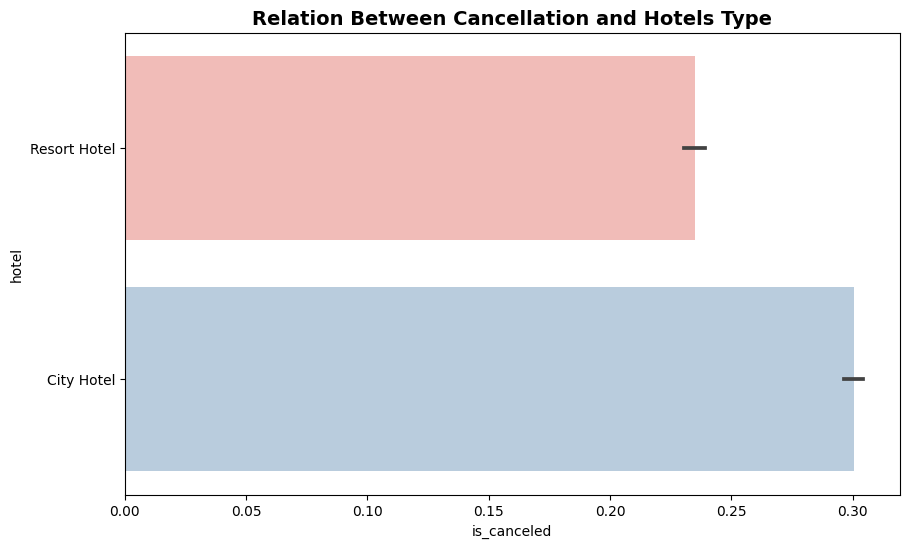

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['is_canceled'], y=df["hotel"], palette='Pastel1')
plt.title("Relation Between Cancellation and Hotels Type", fontweight="bold", size=14)
plt.show()

Text(0.5, 1.0, 'Arrival Date Month vs Rervation Status')

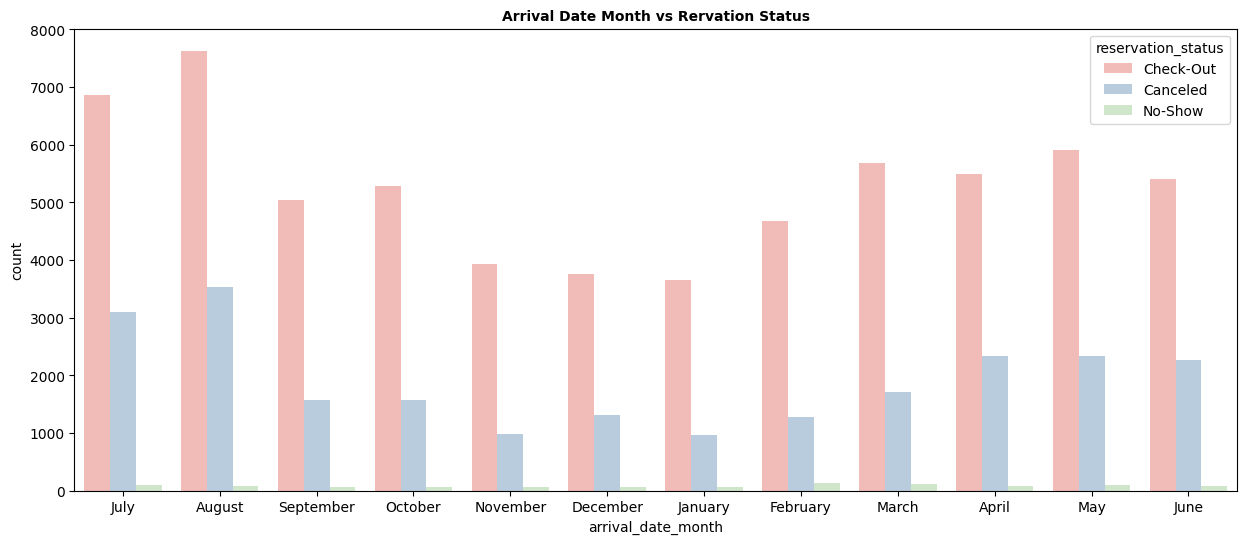

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(x='arrival_date_month',data=df,hue='reservation_status', palette='Pastel1')
plt.title("Arrival Date Month vs Rervation Status",fontweight="bold", size=10)

In [48]:
df['total_guests'] = df['adults']+df['children']+df['babies']

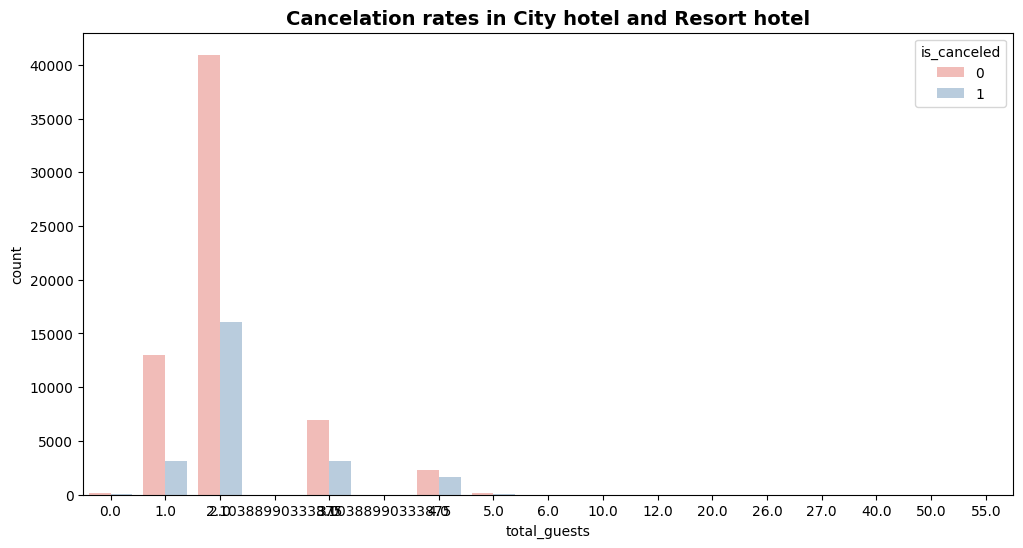

In [51]:
plt.figure(figsize=(12, 6))

sns.countplot(x='total_guests',hue="is_canceled", data=df, palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel", fontweight="bold", size=14)
plt.show()

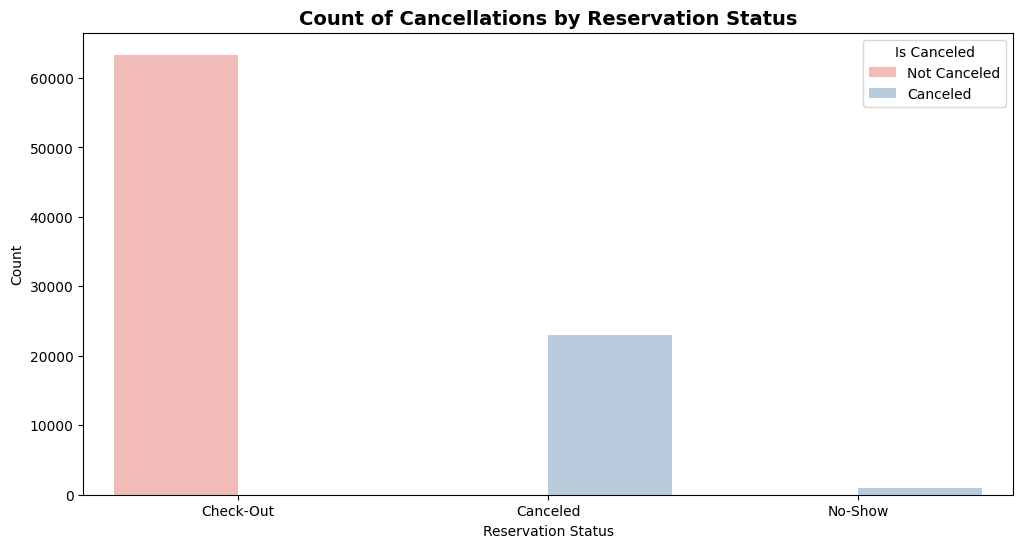

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='reservation_status', hue='is_canceled', data=df, palette='Pastel1')
plt.title('Count of Cancellations by Reservation Status', fontweight="bold", size=14)
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

Text(0.5, 1.0, 'Arriving year, Lead time and Cancelations')

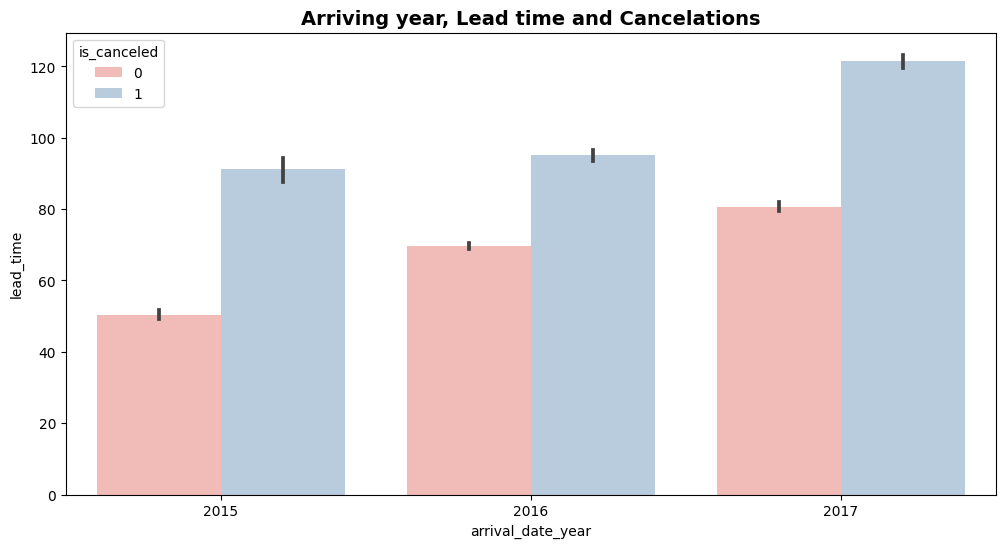

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= df, palette='Pastel1')
plt.title('Arriving year, Lead time and Cancelations', fontweight="bold", size=14)

Text(0.5, 1.0, 'Arrivals per year in Both hotels ')

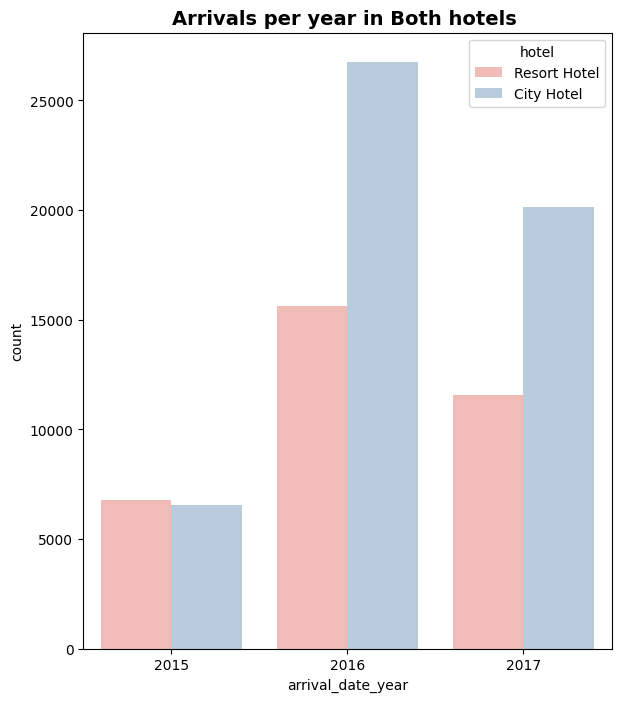

In [41]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='arrival_date_year',hue='hotel', data=df,palette='Pastel1')
plt.title("Arrivals per year in Both hotels ", fontweight="bold", size=14)

Text(0.5, 1.0, 'Types of market segment')

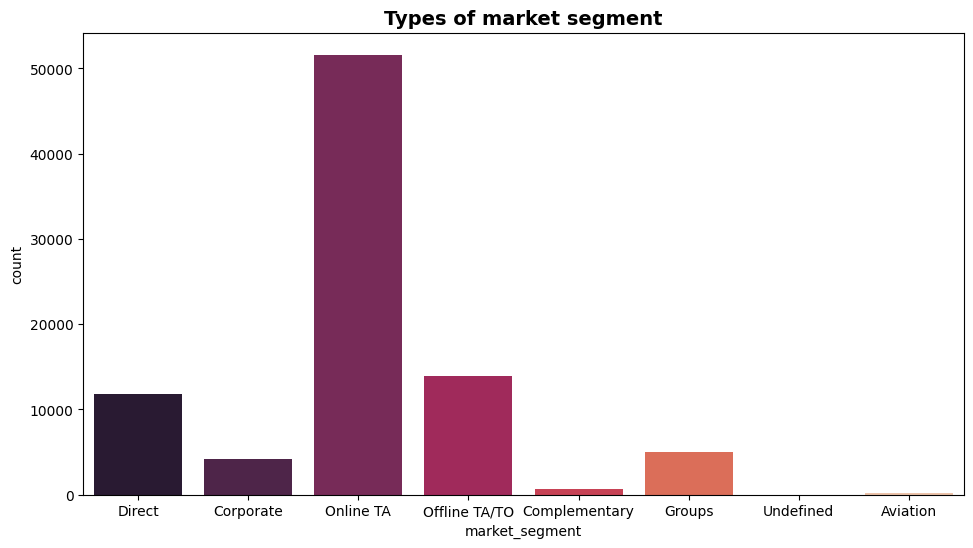

In [42]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='market_segment', data=df, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=14)

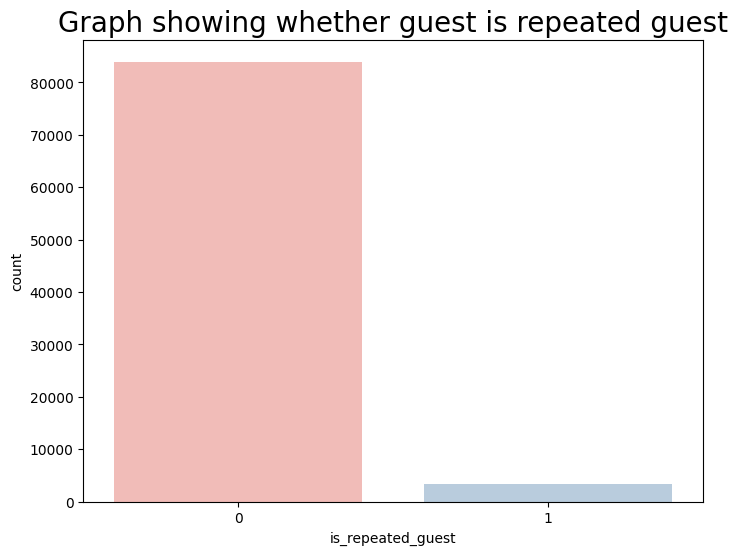

In [43]:
mapping_is_canceled = {0: 'No', 1: 'Yes'}

plt.figure(figsize=(8,6))
sns.countplot(data = df, x= 'is_repeated_guest',palette='Pastel1').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

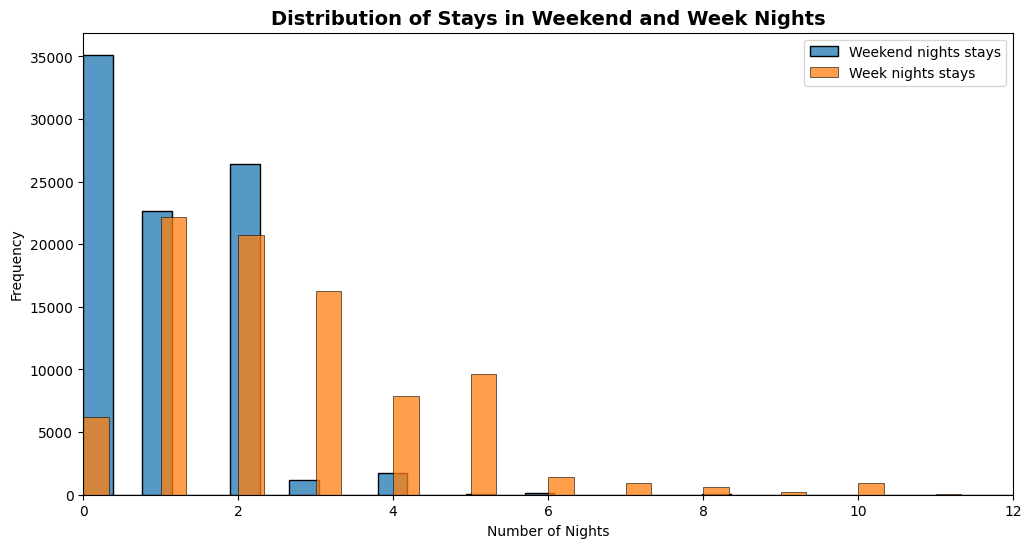

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df['stays_in_weekend_nights'], label="Weekend nights stays", bins=50, kde=False)
sns.histplot(df['stays_in_week_nights'], label="Week nights stays", bins=150, kde=False)
plt.xlim(0,12)
plt.legend()
plt.xlabel('Number of Nights')
plt.ylabel('Frequency')
plt.title('Distribution of Stays in Weekend and Week Nights', fontweight="bold", size=14)

plt.show()

<Figure size 1200x800 with 0 Axes>

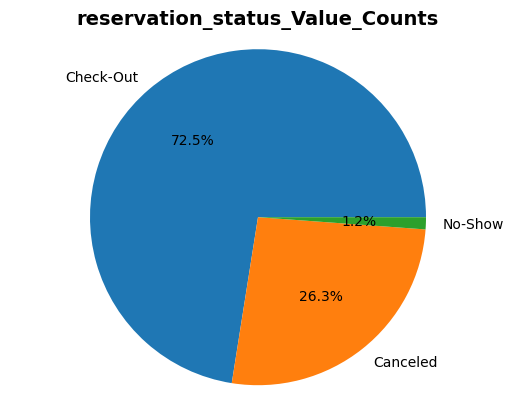

In [45]:
plot_pie_single("reservation_status")

Text(0.5, 1.0, 'Arrivals per year in Both hotels ')

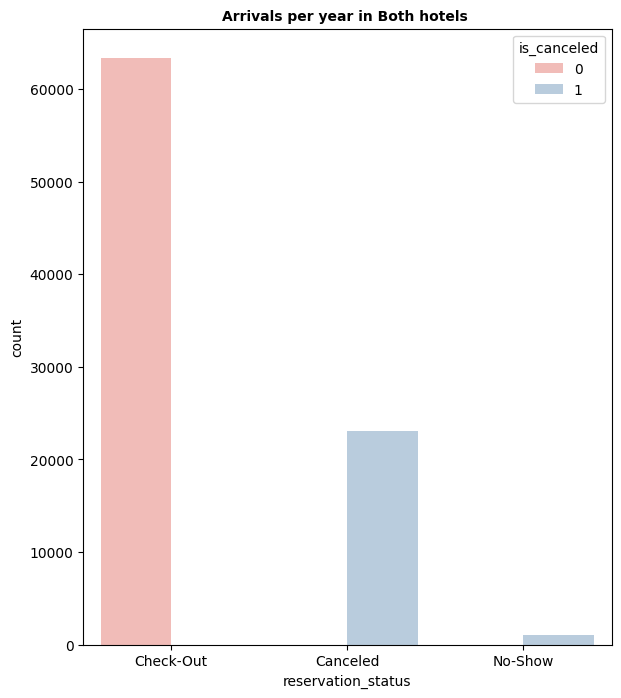

In [46]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='reservation_status',hue='is_canceled', data=df,palette='Pastel1')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=10)

In [ ]:
sns.pairplot(df,hue="is_canceled")